# Project Description
### Build an interactive player pitcher batter dashboard that displays a heatmap (Red -- Blue) by pitch by zone. 

## Import Data Sets

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pybaseball import statcast
from pybaseball import statcast_pitcher

## Data Gathering and Cleaning
- Start by looking at Mike Clevinger's outing on 6/24/2017

In [47]:
# Imports all data from 04-24 to 06-27
df = statcast(start_dt='2017-04-24', end_dt='2017-06-27')

# Define a Ball vs a Strike using pitching "description" variable
Ball = ['ball','blocked_ball','hit_by_pitch','pitchout']
Strike = ['called_strike','foul','foul_bunt','foul_tip','hit_into_play','hit_into_play_no_out',
'hit_into_play_score','missed_bunt','swinging_strike','swinging_strike_blocked']

# Assign B to any Ball and S to any Strike
df['B_S'] = 'NA'
df.loc[df['description'].isin(Ball),'B_S'] = 'B'
df.loc[df['description'].isin(Strike),'B_S'] = 'S'

# Extract only Mike Clevinger's outings for Data Exploration
Clev = df[df["player_name"] == "Mike Clevinger"]

# Select the Variable names of interest
var_names = ['pitch_type', 'release_speed', 'plate_x', 'plate_z']
Clev = Clev[var_names]
Clev.head()

ConnectionError: HTTPSConnectionPool(host='baseballsavant.mlb.com', port=443): Max retries exceeded with url: /statcast_search/csv?all=true&hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7CPO%7CS%7C=&hfSea=&hfSit=&player_type=pitcher&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=2017-06-24&game_date_lt=2017-06-27&team=&position=&hfRO=&home_road=&hfFlag=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_abs=0&type=details& (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C400FB1D48>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

## Exploratory Analysis

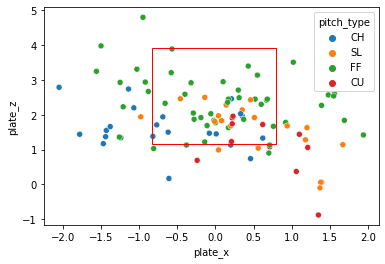

In [49]:
# Frequency of pitch
pitch_cross = pd.crosstab(index=Clev_all["pitch_type"],
                        columns="count")
# Scatter plot of pitch location by pitch type
ax = sns.scatterplot(x='plate_x', y = 'plate_z', hue='pitch_type', data=Clev)
ax.add_patch(plt.Rectangle((-.83,1.17),1.63,2.75,edgecolor = 'red',fill = False))

In [52]:
pitch_cross = pd.crosstab(index=df["description"],
                        columns="count")
                        

In [69]:
a = pitch_cross




col_0,count
B_S,
B,95318
S,166774
